### Import key libraries

In [1]:
import sys
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split
sys.path.append("/home/mindy/Documents/projects/creditCardFraud/scripts/")

In [3]:
from util import plot_relationship

In [4]:
%load_ext autoreload
%autoreload 2

### Load the raw data and perform basic exploratory analysis

In [6]:
RawData = pd.read_csv("../rawdata/creditcard.csv")

In [7]:
RawData.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
RawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
RawData.Class.value_counts(normalize=True).apply(lambda x:x*100)

0    99.827251
1     0.172749
Name: Class, dtype: float64

### Very imbalanced dataset and will try a few methods to see which works better

### Check for data distribution

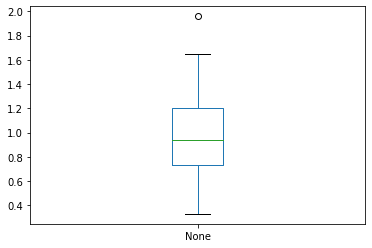

In [10]:
RawData.iloc[:,1:29].std().plot.box()
plt.show()

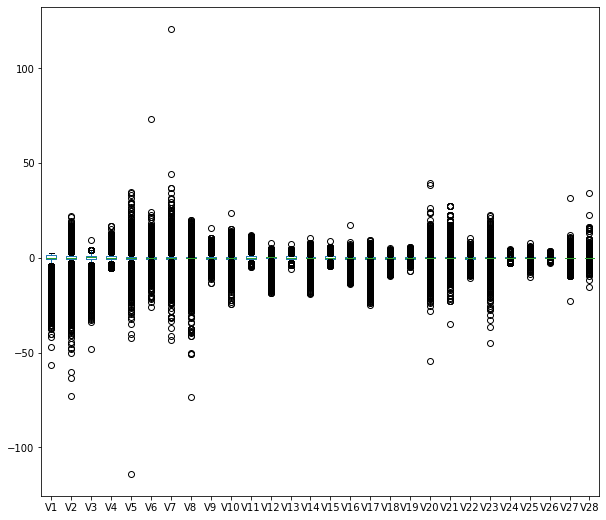

In [11]:
RawData.iloc[:,1:29].plot.box(figsize=(10,9))

plt.show()

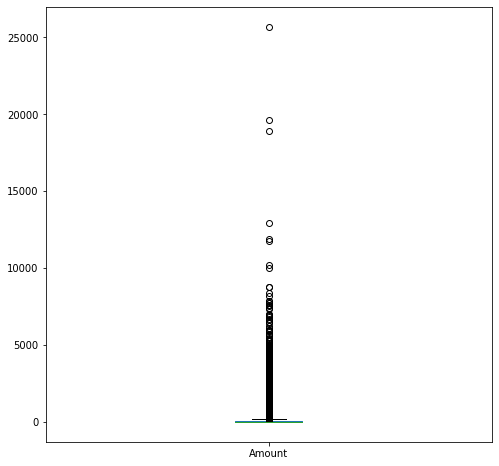

In [12]:
RawData[['Amount']].plot.box(figsize=(8,8))
plt.show()

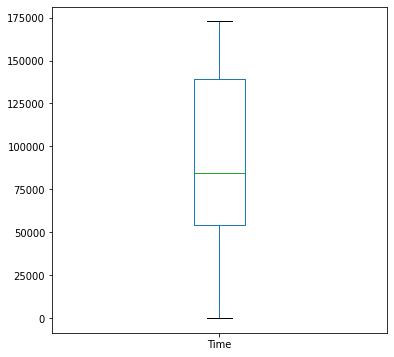

In [13]:
RawData[['Time']].plot.box(figsize=(6,6))
plt.show()

### most of the datasets even with PCA have a lot of outliers, we will need to perform scaling for each column

### Look at feature relationships with both classes   
* Noticed time is in number of seconds elapsed from the first transation, which won't give very good information as it doesn't show 24 hour cycle pattern (this dataset is 2 days) 

In [14]:
# convert to 24 hour interval 
RawData["Time_hourly"]= RawData.Time.apply(lambda x:x/3600%24)

## Look at relationships for each column with respect to the label 

Check distribution among 2 classes for feature Time


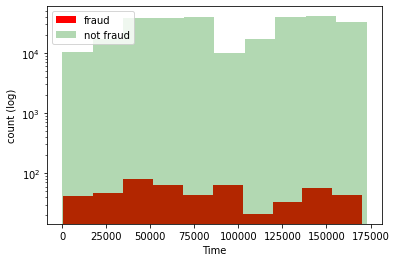

Check distribution among 2 classes for feature V1


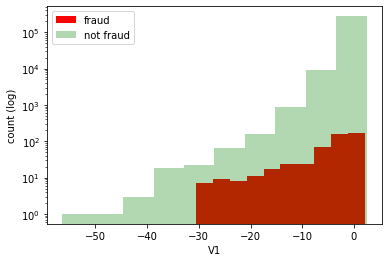

Check distribution among 2 classes for feature V2


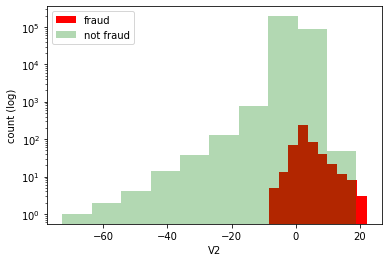

Check distribution among 2 classes for feature V3


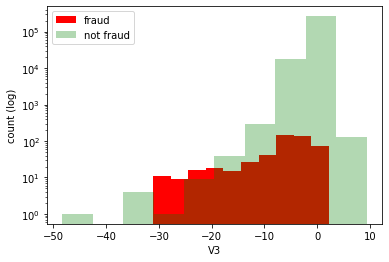

Check distribution among 2 classes for feature V4


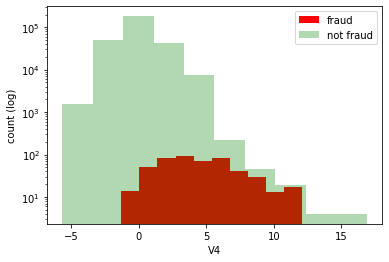

Check distribution among 2 classes for feature V5


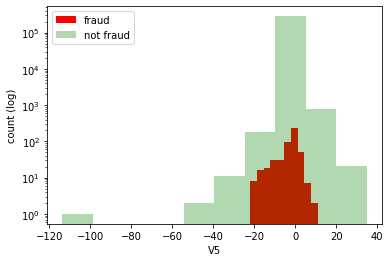

Check distribution among 2 classes for feature V6


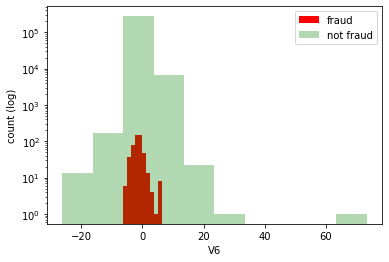

Check distribution among 2 classes for feature V7


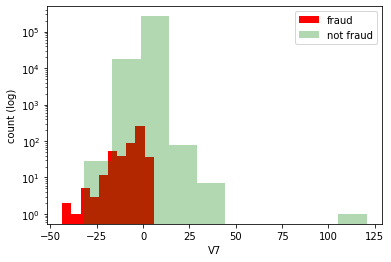

Check distribution among 2 classes for feature V8


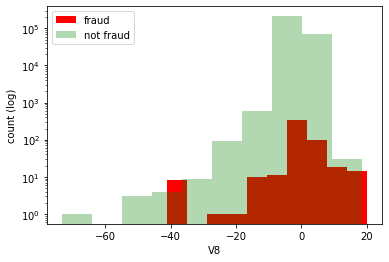

Check distribution among 2 classes for feature V9


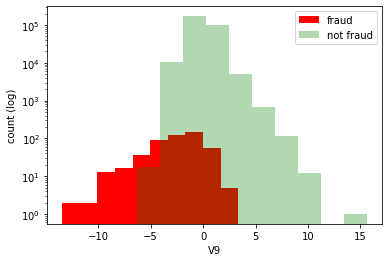

Check distribution among 2 classes for feature V10


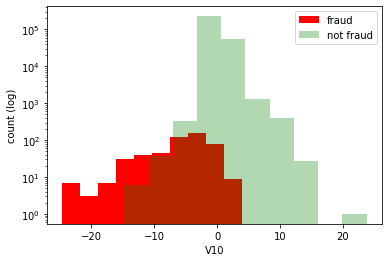

Check distribution among 2 classes for feature V11


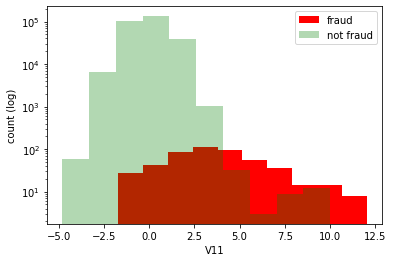

Check distribution among 2 classes for feature V12


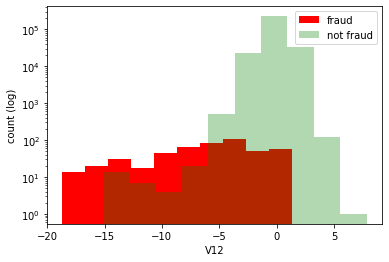

Check distribution among 2 classes for feature V13


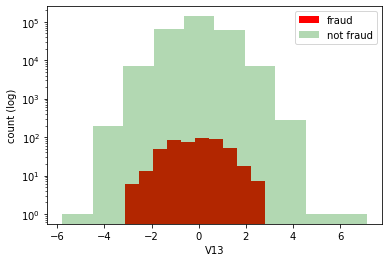

Check distribution among 2 classes for feature V14


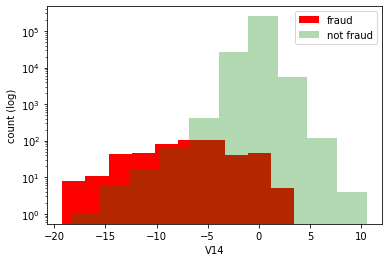

Check distribution among 2 classes for feature V15


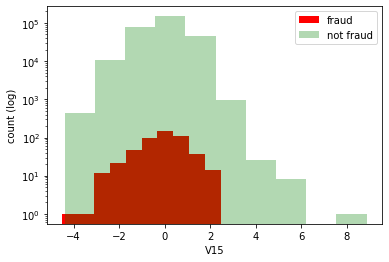

Check distribution among 2 classes for feature V16


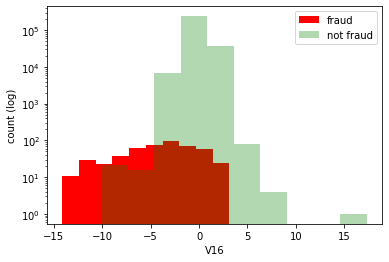

Check distribution among 2 classes for feature V17


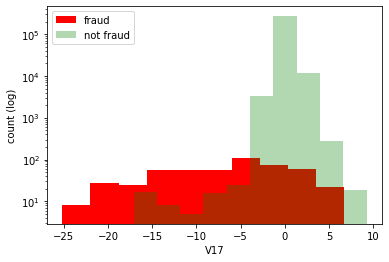

Check distribution among 2 classes for feature V18


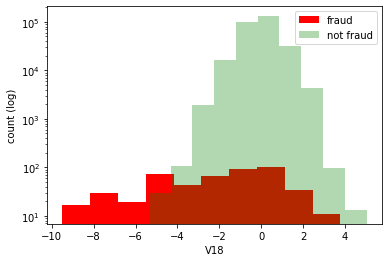

Check distribution among 2 classes for feature V19


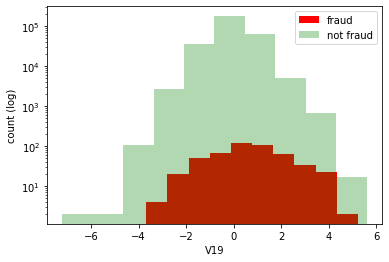

Check distribution among 2 classes for feature V20


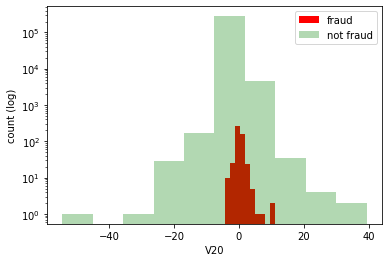

Check distribution among 2 classes for feature V21


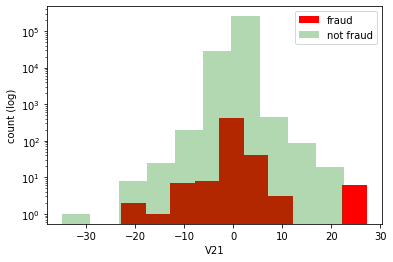

Check distribution among 2 classes for feature V22


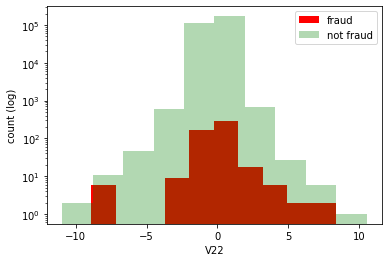

Check distribution among 2 classes for feature V23


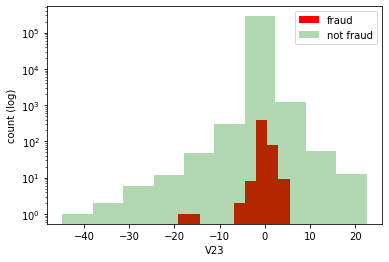

Check distribution among 2 classes for feature V24


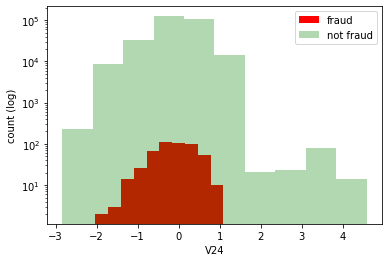

Check distribution among 2 classes for feature V25


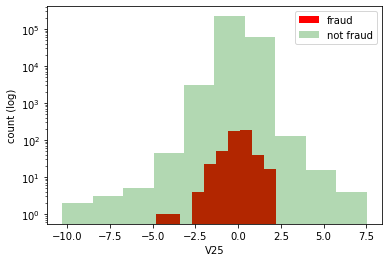

Check distribution among 2 classes for feature V26


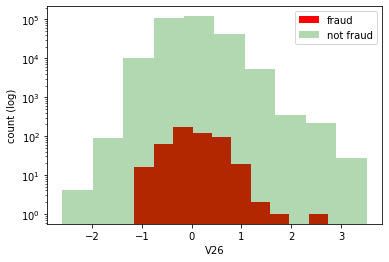

Check distribution among 2 classes for feature V27


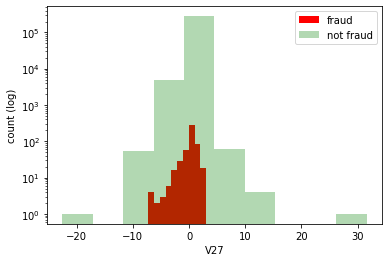

Check distribution among 2 classes for feature V28


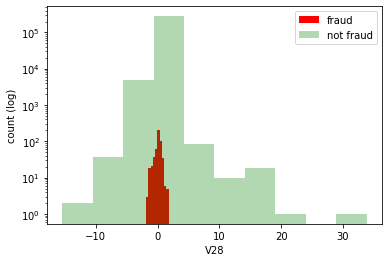

Check distribution among 2 classes for feature Amount


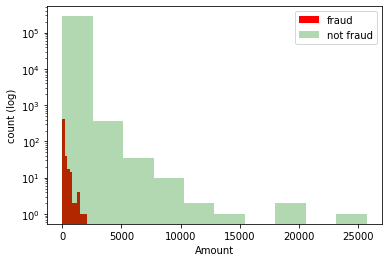

Check distribution among 2 classes for feature Time_hourly


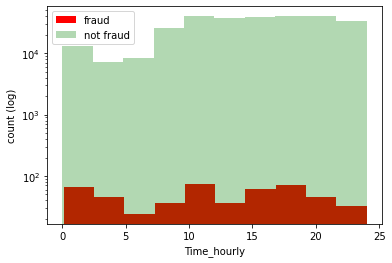

In [15]:
for col in RawData.drop("Class",axis=1).columns:
    print(f"Check distribution among 2 classes for feature {col}")
    plot_relationship(RawData,"Class",col)

### Most of the features show a big difference in distribution between Fraud and not Fraud

### Time in seconds elapsed showed very little difference but time in hourly transations over period of 24 hours show slight abnormal bevavior from time AM (more active during ealry AM and drop activity during day time while not fraud tend to be flatten but only saw a drop from time 2 am to 9 am) 

### Drop Time feature and perform scaling to ensure all columns have similar scale 

In [16]:
feature_columns = RawData.drop(["Class","Time"],axis=1).columns

### The Amount dataset seems to have very different scale as compared to other, so we will log it to make it have similar scala as other features to make gradient descent faster 

In [17]:
Data_processed = RawData.drop(["Time"],axis=1)

In [18]:
Data_processed["Amount"]=np.log(Data_processed["Amount"]+0.001)

In [19]:
Data_processed.Amount.max(), Data_processed.Amount.min()

(10.153902281764749, -6.907755278982137)

### Split into training data set and test set (hold out set)

### Split training data into train and dev for normal class only

In [20]:
train, test = train_test_split(Data_processed,test_size=0.2)

In [21]:
normal = train[train.Class==0].drop("Class",axis=1)
X_train, X_dev = train_test_split(normal,test_size = 0.2)

### Save the processed data for anomaly detection

In [23]:
X_train.to_csv("../processedData/TrainingData_normal.csv")
X_dev.to_csv("../processedData/DevData_normal.csv")
pd.concat([test,train[train.Class==1]], axis=0).to_csv("../processedData/hold_outset_moreFraud.csv")